# Sidenote: Plotting FDR curves

To demonstrate how to plot this information, let's plot FDR curves for 16 relatively-high-mutation-rate contigs. We will select these 16 contigs based on the diversity indices.

In [82]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot
pyplot.style.use("ggplot")

## Load computed FDR estimate and (number of mutations per megabase) information

In [22]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

output_dir = "/Poppy/mfedarko/sftests/tutorial-output/p15-fdr-info"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir("/Poppy/mfedarko/sftests/tutorial-output/p15-fdr-info/"):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print("All decoy contexts we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All decoy contexts we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
edge_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10090,53.431465,44.408169,35.816020,31.381362,26.823519,23.251156,19.801978,17.954204,15.398117,13.673528,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
edge_1016,229.105623,190.415163,153.573395,134.558288,115.014984,99.697260,84.907732,76.984771,66.024675,58.629912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10177,21.377475,17.767331,14.329685,12.555416,10.731862,9.302590,7.922603,7.183324,6.160656,5.470662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load diversity index information and select high-diversity-index contigs

In [12]:
di.columns

Index(['AverageCoverage', 'Length', 'DivIdx(p=50,minSuffCov=1000.0)',
       'DivIdx(p=100,minSuffCov=500.0)', 'DivIdx(p=200,minSuffCov=250.0)',
       'DivIdx(p=500,minSuffCov=100.0)', 'DivIdx(p=1000,minSuffCov=50.0)',
       'DivIdx(p=2500,minSuffCov=20.0)', 'DivIdx(p=5000,minSuffCov=10.0)'],
      dtype='object')

We'll use the diversity index values for $p = 1\%$ as a way to select the 16 "highest diversity" contigs.

The choice of $p = 1\%$ is essentially arbitrary -- this is the smallest value of $p$ (of the values that `strainFlye call p-mutation` considered) for which at least 16 long (≥ 1 Mbp) contigs have a defined diversity index. (And the choice of drawing 16 contigs is also arbitrary. I just wanted to make a nice 4x4 plot!)

In [177]:
di = pd.read_csv(
    "/Poppy/mfedarko/sftests/tutorial-output/call-p15/diversity-indices.tsv", sep="\t", index_col=0
)
di_sorted = di.sort_values(["DivIdx(p=100,minSuffCov=500.0)"], ascending=False)
di_sorted.head(16)

,AverageCoverage,Length,"DivIdx(p=50,minSuffCov=1000.0)","DivIdx(p=100,minSuffCov=500.0)","DivIdx(p=200,minSuffCov=250.0)","DivIdx(p=500,minSuffCov=100.0)","DivIdx(p=1000,minSuffCov=50.0)","DivIdx(p=2500,minSuffCov=20.0)","DivIdx(p=5000,minSuffCov=10.0)"
Contig,,,,,,,,,
edge_3030,1035.740707,1915304,0.041088,0.033952,0.031322,0.025060,0.017557,4.156003e-04,1.566332e-06
edge_7356,742.905564,1602179,0.024833,0.021453,0.017328,0.006580,0.001584,2.563919e-04,0.000000e+00
edge_1526,518.044165,2338731,NaN,0.019049,0.016268,0.012120,0.007084,5.687054e-04,4.320621e-07
edge_7354,1119.104000,1036318,0.023789,0.018875,0.015372,0.009458,0.005996,1.543928e-05,0.000000e+00
edge_3402,877.282137,3713351,0.024924,0.018800,0.012130,0.002100,0.000195,1.008768e-04,2.706565e-07
edge_1717,603.009889,2679593,NaN,0.017519,0.012952,0.008134,0.002695,1.836866e-04,0.000000e+00
edge_1719,489.317975,1504657,NaN,0.013607,0.005361,0.000357,0.000215,7.975865e-05,0.000000e+00
edge_4811,608.536703,1166051,NaN,0.013417,0.009829,0.003664,0.000352,0.000000e+00,0.000000e+00
edge_1671,1415.072755,2153394,0.011340,0.010501,0.008338,0.003400,0.000240,4.679987e-07,0.000000e+00


## Plot FDR curves for these high-diversity-index contigs

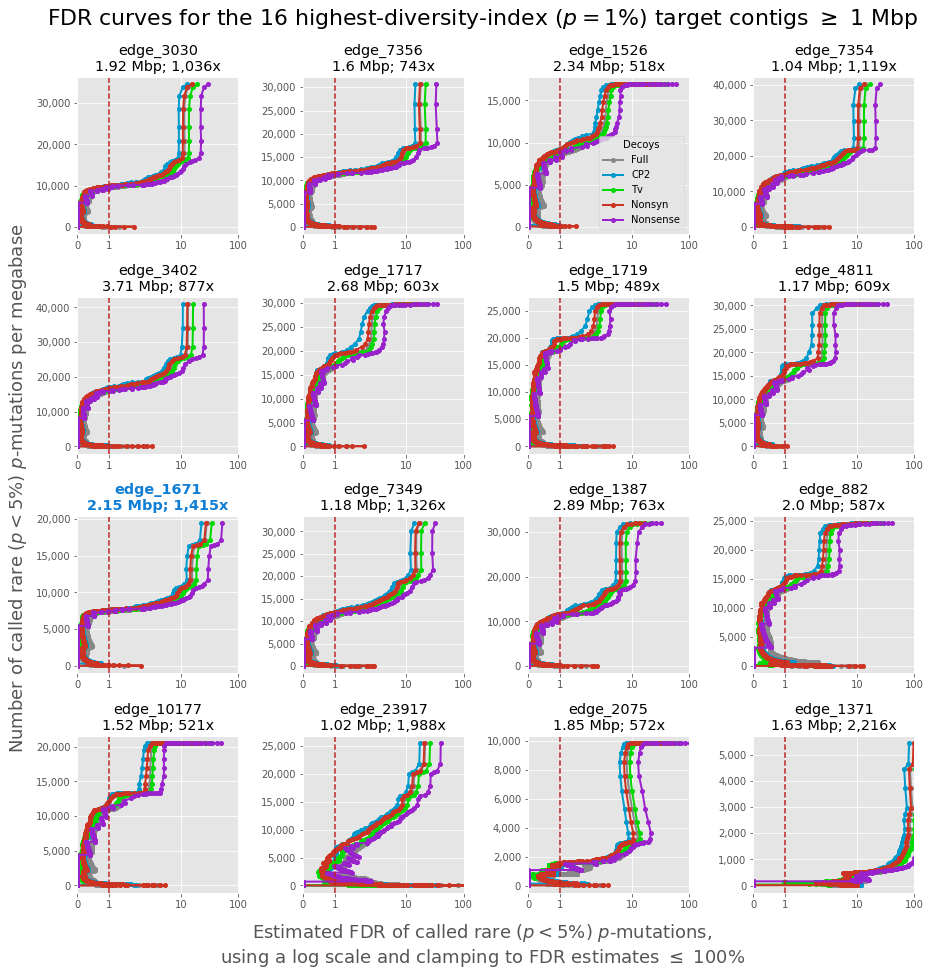

In [185]:
num_plots_along_square_side = 4
num_plots = num_plots_along_square_side ** 2
fig, axes = pyplot.subplots(rows, cols, gridspec_kw={"hspace": 0.4, "wspace": 0.4})

# rainbow colorscheme - inspired by Elias/Gygi '07, Fig. 2a & 2b
fdr_colors = [
    "#222", "#713F16", "#D40000", "#D47400", "#D4CE00", "#41CC00", "#00CCC3", "#0079CC", "#0022CC", "#A400CC",
    "#CC007C"
]
colormap = {
    "Full": "#888888", "CP2": "#0099cc", "Tv": "#00D900", "Nonsyn": "#cc3322", "Nonsense": "#9922cc",
    "CP2Tv": "#00D4D8", "CP2Nonsyn": "#ab090c", "CP2Nonsense": "#772277", "CP2TvNonsense": "#3C2277",
    "TvNonsyn": "#DF7F06", "TvNonsense": "#065BDF"
}

contigs_to_plot = list(di_sorted.index[:num_plots])

# Ignore the decoy genome here: we don't have FDR estimates for it
# (it shouldn't show up in the list of high-diversity-index contigs, anyway)
if "edge_6104" in contigs_to_plot:
    contigs_to_plot.remove("edge_6104")
    contigs_to_plot.append(di_long_sorted.index[num_plots])

for ci, contig in enumerate(contigs_to_plot):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # 8 9 A B
    # C D E F
    col = ci % num_plots_along_square_side
    row = floor(ci / num_plots_along_square_side)
    
    length_info = f"{round(di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    
    # Highlight the "selected" contigs shown in the paper (BACT1, BACT2) in blue
    tparams = {}
    if contig == "edge_1671" or contig == "edge_2358":
        tparams = {"fontweight": "semibold", "color": "#0f7ed4"}
    axes[row, col].set_title(title, **tparams)
    
    for ctx in ["Full", "CP2", "Tv", "Nonsyn", "Nonsense"]:
        # Figure out exactly which points to plot -- ignore cases where no (rare) mutations were called
        # for this contig, since this results in a target mutation rate of 0 (resulting in an
        # undefined FDR). I'm pretty sure matplotlib will automatially account for this case without
        # us needing to do this, but I'm paranoid.
        x = []
        y = []
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        for f, n in zip(xvals, yvals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)

        # only add labels for one of the plots, since otherwise matplotlib will populate the legend
        # with (# decoy contexts) * (# plots) labels.
        if ci == 2:
            label = ctx
        else:
            label = None
        axes[row, col].plot(x, y, marker="o", lw=2, color=colormap[ctx], label=label, markersize=4)
        
    axes[row, col].axvline(x=1, linestyle="--", color="#b22")
    axes[row, col].set_xscale("symlog")
    axes[row, col].xaxis.set_major_formatter("{x:,.0f}")
    axes[row, col].yaxis.set_major_formatter("{x:,.0f}")
    axes[row, col].set_xlim(0, 100)

axes[0, 2].legend(title="Decoys")
fig.text(
    0.06, 0.26, "Number of called rare ($p < 5\%$) $p$-mutations per megabase",
    fontsize=18, rotation="vertical", color="#555"
)
fig.text(
    0.5, 0.06,
    "Estimated FDR of called rare ($p < 5\%$) $p$-mutations,\nusing a log scale and clamping to FDR estimates $\leq$ 100%",
    fontsize=18, color="#555", ha="center"
)
fig.suptitle(
    f"FDR curves for the {num_plots} highest-diversity-index ($p = 1\%$) target contigs $\geq$ 1 Mbp",
    fontsize=22,
    y=0.945
)
fig.set_size_inches(15, 15)

## Plot the FDR curve for BACT1 (`edge_1671`) in a larger space, with all\* decoy contexts


__\*__ Ignoring the "CP2 + Nonsynonymous" context, since it visually overlaps with the "CP2" context. (I've kept "CP2 + Nonsynonymous" as an option because it is technically slightly different from just CP2—there is one synonymous single-nucleotide CP2 mutation, `TGA (stop) <---> TAA (stop)`.)

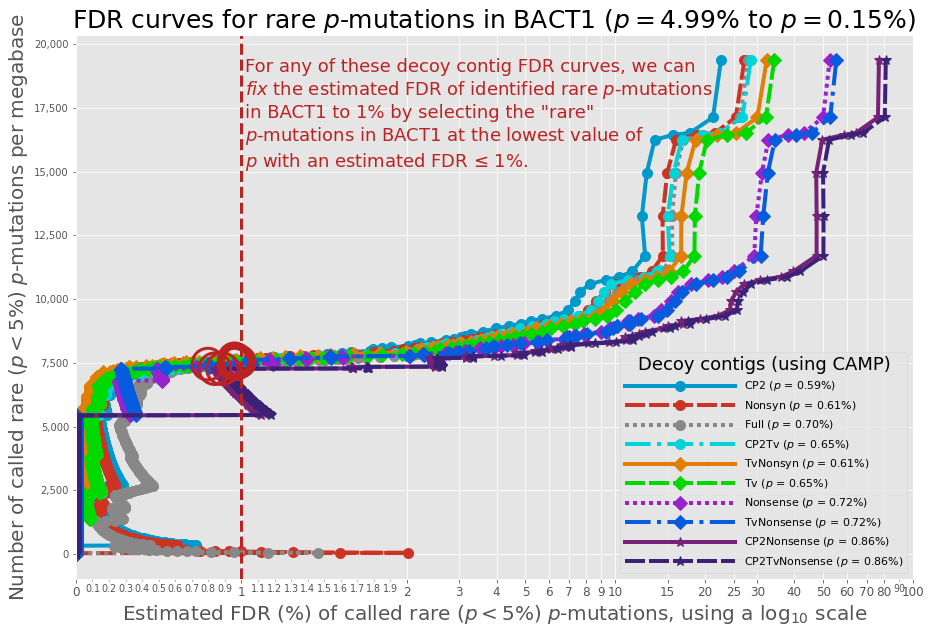

In [189]:
fig, ax = pyplot.subplots()

contig = "edge_1671"

length_info = f"{round(di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
cov_info = f"{round(di_sorted['AverageCoverage'][contig]):,}x"
title = f"{contig}\n{length_info}; {cov_info}"

# go solid, dashed, dotted, dashdot, ...
# this way of varying linestyles and markers means that even if the reader cannot perceive color
# they should still be able to unambiguously figure out which line is which
linestyles = ["solid", (0,(5,1)), (0, (1,1)), "dashdot"]
markers = (["o"] * 4) + (["D"] * 4) + (["*"] * 2)

fdr_fix_pct = 1
fdr_fix_color = "#b22"

ctxs_to_show = sorted(ctx2fdr.keys(), key=lambda ctx: ctx2fdr[ctx]["p15"][contig])
# don't show CP2Nonsyn since it almost completely overlaps CP2
ctxs_to_show.remove("CP2Nonsyn")

for ctx_i, ctx in enumerate(ctxs_to_show):
    x = []
    y = []
    best_p = None
    best_p_x = None
    best_p_y = None
    
    xvals = ctx2fdr[ctx].loc[contig]
    yvals = numpermbs.loc[contig]
    pvals = [int(pstr[1:]) for pstr in numpermbs.columns]
    
    for f, n, p in zip(xvals, yvals, pvals):
        if not pd.isna(f):
            x.append(f)
            y.append(n)
            if f <= fdr_fix_pct:
                # we're iterating through these in ascending order, so i guess we could just break once
                # we see a "passing" value of p. but let's idiotproof this in case i change the order later lol
                if best_p is None or p < best_p:
                    best_p = p
                    best_p_x = f
                    best_p_y = n
                    

    if best_p is not None:
        label = f"{ctx} ($p$ = {best_p/100:.2f}%)"
        # https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/ReadClustering-DiverseGene.ipynb
        ax.scatter(best_p_x, best_p_y, 1000, color=fdr_fix_color, facecolor="none", lw=3, zorder=999)
    else:
        label = f"{ctx} (no rare mutations selectable)"
    ax.plot(
        x, y, marker=markers[ctx_i], color=colormap[ctx], linestyle=linestyles[ctx_i % len(linestyles)],
        lw=4, label=label, markersize=10
    )

ax.axvline(x=fdr_fix_pct, linestyle="--", lw=3, color=fdr_fix_color)
ax.set_xscale("symlog")
ax.xaxis.set_major_formatter("{x:,.0f}")
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_xlim(0, 100)

# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x > 20 else "{:,}".format(x)
)
ax.xaxis.set_major_formatter(ff)
ax.xaxis.set_minor_formatter(ff)
ax.set_xticks([x / 10 for x in range(1, 20)] + [90], minor=True)
ax.set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
ax.tick_params(axis="x", which="major", labelsize=12)
ax.tick_params(axis="x", which="minor", labelsize=9.5)

ax.legend(handlelength=10, fontsize=11, title="Decoy contigs (using CAMP)", title_fontsize=18)

ax.set_ylabel(
    "Number of called rare ($p < 5\%$) $p$-mutations per megabase",
    fontsize=20
)
ax.set_xlabel(
    "Estimated FDR (%) of called rare ($p < 5\%$) $p$-mutations, using a log$_{10}$ scale",
    fontsize=20
)
ax.set_title(
    f"FDR curves for rare $p$-mutations in BACT1 ($p = 4.99\%$ to $p = 0.15\%$)",
    fontsize=25
)

ax.text(
    1.02, 15200,
    (
        'For any of these decoy contig FDR curves, we can\n$fix$ the estimated FDR of identified '
        'rare $p$-mutations\nin BACT1 to 1% by selecting the "rare"\n$p$-mutations in BACT1 '
        "at the lowest value of\n$p$ with an estimated FDR \u2264 1%."
    ),
    color=fdr_fix_color,
    fontsize=18
)
fig.set_size_inches(15, 10)